# Heart Patient Data Analysis on kaggle [dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

Heart disease is one of the leading causes of death worldwide, and early diagnosis is crucial for effective treatment and prevention. With the increasing availability of electronic health records, machine learning techniques can be applied to predict heart disease risk and improve patient outcomes. This project aims to analyze a dataset of heart patients using supervised machine learning algorithms to identify key predictors of heart disease and develop an accurate predictive model                                                                            
## By Imtiaz Ali 
### Machine learning Engineer with Bachelors in Mathematics & Statistics.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Load the dataset
df = pd.read_csv('heart patient data.csv')

# Display the first few rows of the dataset
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Dataset Description

## Chest Pain Type (cp)
- *Value 1*: Typical Angina
- *Value 2*: Atypical Angina
- *Value 3*: Non-Anginal Pain
- *Value 4*: Asymptomatic

### Typical Angina:
- Occurs with physical activity or stress
- Lasts for a few minutes
- Radiates to the arms, neck, jaw, or back
- Relieved by rest or medication

### Atypical Angina:
- Occurs at rest
- Not relieved by medication
- More severe or prolonged pain

### Non-Anginal Pain:
- Not related to angina or coronary artery disease
- May include musculoskeletal, gastrointestinal, or pulmonary issues

### Asymptomatic:
- No chest pain or discomfort

---

## Resting Blood Pressure (trtbps)
- *Description*: Resting blood pressure in mm Hg

---

## Cholesterol (chol)
- *Description*: Cholesterol in mg/dl fetched via BMI sensor

---

## Fasting Blood Sugar (fbs)
- *Description*: (Fasting blood sugar > 120 mg/dl)
- *Values*: 
  - 1: True 
  - 0: False

---

## Resting Electrocardiographic Results (restecg)
- *Value 0*: Normal
- *Value 1*: Having ST-T wave abnormality (T wave inversions, ST elevation or depression > 0.05 mV)
- *Value 2*: Probable or definite left ventricular hypertrophy by Estes' criteria

---

## Maximum Heart Rate Achieved (thalach)
- *Description*: Maximum heart rate during exercise

---

## Exercise Induced Angina (exang)
- *Description*: Chest pain or discomfort during physical activity
- *Values*:
  - 1: Yes
  - 0: No

---

## Oldpeak (ST Depression)
- *Description*: ST depression induced by exercise relative to rest
- *Values*: A numerical value (0-6)

---

## Slope of Peak Exercise ST Segment (slp)
- *Description*: Slope of the ST segment during peak exercise
- *Values*:
  - 0: Upsloping (Normal)
  - 1: Flat (Less healthy, potential heart problems)
  - 2: Downsloping (Higher chances of heart disease)

---

## Number of Major Vessels (caa)
- *Description*: Number of major coronary arteries visible through fluoroscopy
- *Values*: Numerical value (0-3)

---

## Thalassemia (thall)
- *Description*: Thallium stress test result
- *Values*:
  - 0: Normal
  - 1: Fixed defect
  - 2: Reversible defect
  - 3: Mixed defect (if applicable)

---

## Output (target)
- *Description*: Probability of heart attack
- *Values*:
  - 0: Less chance of heart attack
  - 1: More chance of heart attack


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [5]:
# Check unique values in each column
unique_values = df.nunique()
print(unique_values)

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64


# Analysis Outputs (7)

The variables with few unique values are treated as categorical variables, and the variables with high unique values are treated as numeric variables.


In [6]:
numeric_var = ["age", "trtbps", "chol", "thalachh", "oldpeak"]
categoric_var = ["sex", "cp", "fbs", "restecg", "exng", "slp", "caa", "thall", "output"]

# Examining Statistics of numeric Variables
df[numeric_var].describe()

,age,trtbps,chol,thalachh,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


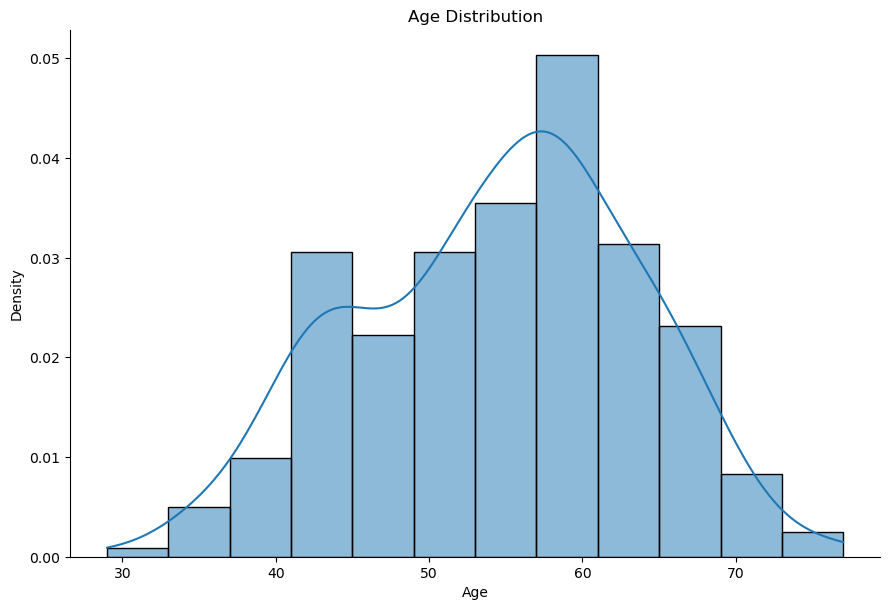

In [7]:
# Plot using distplot for age variable with density
sns.displot(df["age"], kde=True, stat='density', height=6, aspect=1.5)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

# Analysis of "age" variable:

- **Min**: 29
- **Max**: 77
- **Midpoint** (mathematically calculated \((29 + 77) / 2\)): 53
- **Mean**: 54 (close to midpoint, indicating normal distribution)

The data average 54.3 is in the middle of the 25% and 75% quarters. This also means that the age variable is prone to the normal distribution.
- 25% of people are younger than 47.5
- 50% of people are between 47.5 and 55
- 25% of people are between 55 and 61
- 25% of people are older than 61


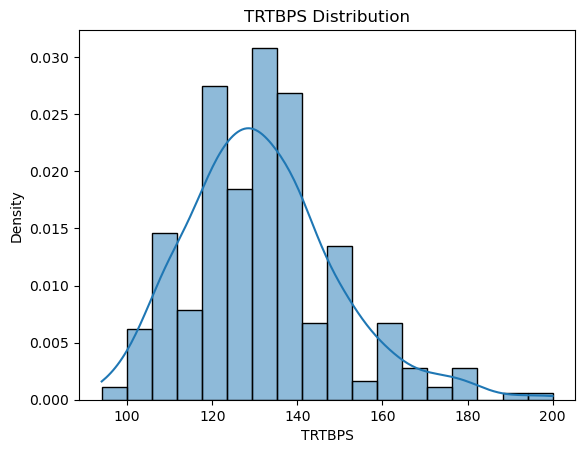

In [8]:
## Plot using histplot for 'trtbps' variable with density
sns.histplot(df["trtbps"], kde=True, stat='density', linewidth=1, edgecolor="k")
plt.title("TRTBPS Distribution")
plt.xlabel("TRTBPS")
plt.ylabel("Density")
plt.show()

## Analysis of the 'trtbps' Variable


### Summary Statistics

- Range: 94-200
- Mean: 131 (close to midpoint of 147)

### Distribution Analysis

### The 'trtbps' variable:

- Tends to be normally distributed with a slight right skew due to lack of data on the left side.
- Approximately normally distributed, but with a slight asymmetry.
- This might be due to:
    - Outliers
    - Slight deviation from perfect normality


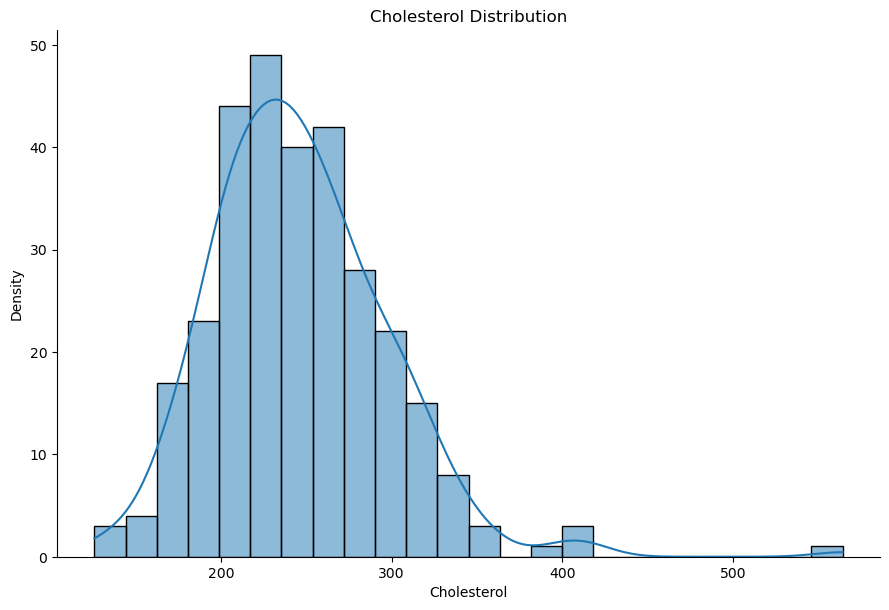

In [9]:
# Plot using displot for 'chol' variable
sns.displot(df["chol"], kde=True, height=6, aspect=1.5)
plt.title("Cholesterol Distribution")
plt.xlabel("Cholesterol")
plt.ylabel("Density")
plt.show()

## Analysis of the 'chol' Variable

### Summary Statistics

- Range: 126-564
- Mean: 246 (left of midpoint 345)

#### Distribution Analysis

- Quartiles: 75% of data is below 274, indicating left-skewed data
- Skewness: Right skewness due to outlier values


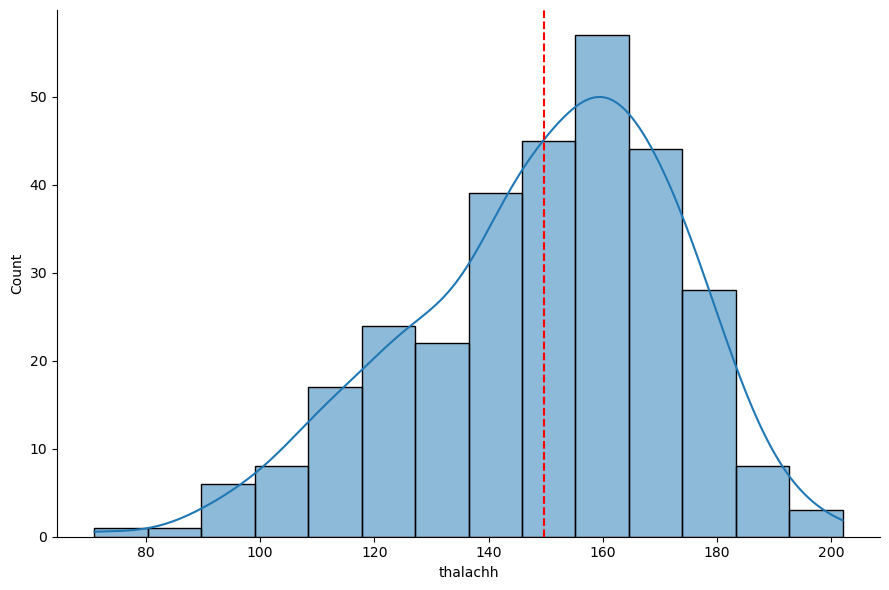

In [10]:
# Plot using displot for 'thalachh' variable
sns.displot(df["thalachh"], kde=True, height=6, aspect=1.5)

# Add a vertical line at the mean
plt.axvline(df["thalachh"].mean(), color="r", ls="--")

# Show the plot
plt.show()

# Analysis of the "thalach" Variable

## Summary Statistics

- Minimum value: 71
- Maximum value: 202
- Midpoint: 137
- Mean: 149.6

## Distribution Analysis

- Skewness: Left skew, but minimal
- Quartiles: (25%, 50%, 75%) are homogeneously distributed
- Normality: Data tends to be normally distributed with a slight left skew

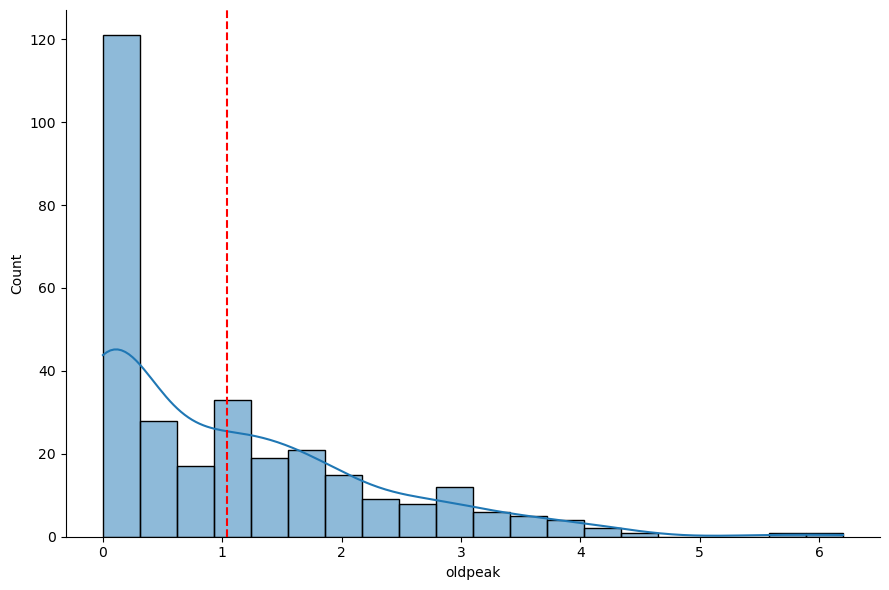

In [11]:
sns.displot(df["oldpeak"], bins=20, kde=True, height=6, aspect=1.5)
plt.axvline(df["oldpeak"].mean(), color="r", ls="--")
plt.show()

# Analysis of the "oldpeak" Variable

## Summary Statistics

- Minimum value: 0
- Maximum value: 6.20
- Midpoint: 3.10
- Mean: 1.03

## Distribution Analysis

- Quartiles: 75% of data is below 1.60
- Skewness: Significant right skew in the data


In [12]:
# Uni-variate Analysis
numeric_var

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

In [13]:
numeric_axis_name = ["Age of the Patient", "Resting Blood Pressure", "Cholesterol", "Maximum Heart Rate Achieved", "ST Depression"]


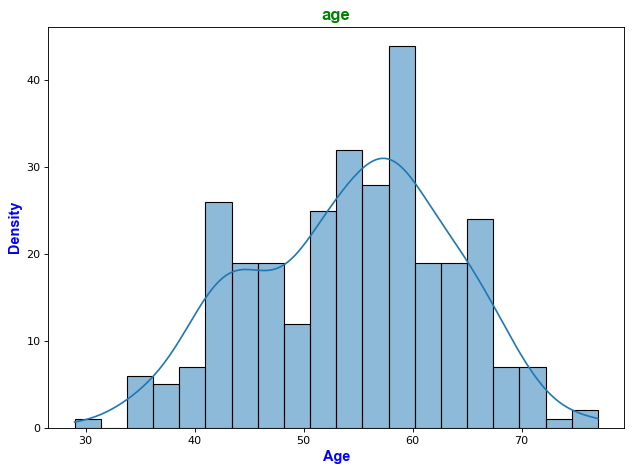

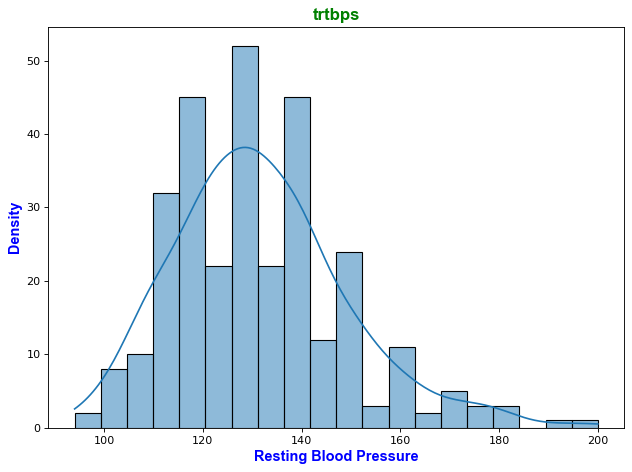

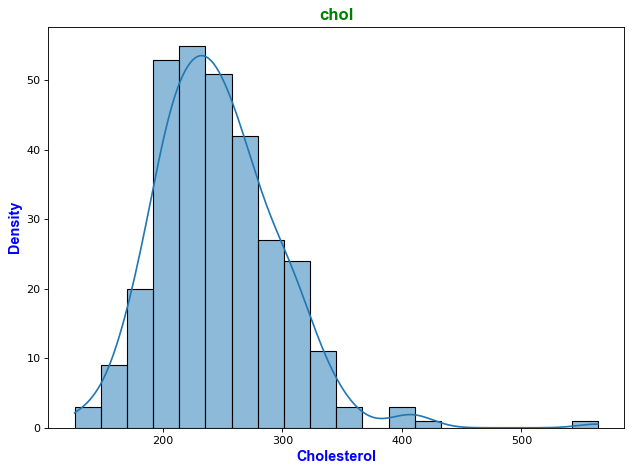

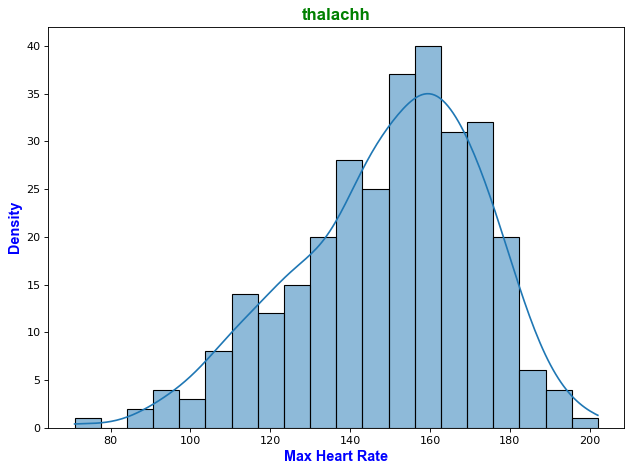

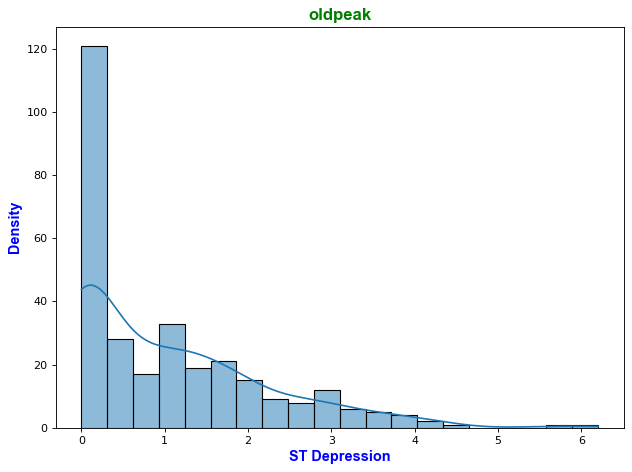

In [14]:
numeric_var = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
numeric_axis_name = ['Age', 'Resting Blood Pressure', 'Cholesterol', 'Max Heart Rate', 'ST Depression']

title_font = {"family" : "arial", "color" : "Green", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "Blue", "weight" : "bold", "size" : 13}

for i, z in list(zip(numeric_var, numeric_axis_name)):
    plt.figure(figsize = (8,6), dpi=80)
    sns.histplot(df[i], bins=20, kde=True, linewidth=1, edgecolor="k")
    plt.title(i, fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("Density", fontdict = axis_font)
    plt.tight_layout()
    plt.show()

# Analysis of Age Variable

- Most patients are between 50-60 years old
- Notable decrease in patients between 47-50 years old
- No apparent outliers in the Age variable
- Data appears to be clustered, with a clear majority in the 50-60 age range

# Analysis of Trtbps Variable

- Resting blood pressure of most patients is generally between 110 and 140
- Values after 180 can be considered as outliers
- Hefty patient traffic between 115-120, 125-130, and 155-160 values

# Analysis of Cholesterol Variable

- Cholesterol value in most patients is between 200 and 280
- Values after 380 can be considered as outliers

# Analysis of Thalach Variable

- Maximum heart rate achieved in most patients is between 145 and 170
- Values before 80 can be considered outliers

# Analysis of Oldpeak Variable

- Values of the vast majority of patients in the variable range from 0 to 1.5
- Especially values after 2.5 can be considered as outliers


In [15]:
# Categorical Variables(Analysis with Pie Chart)
print(categoric_var)
categoric_axis_name = ["Gender", "Chest Pain Type", "Fasting Blood sugar", "Resting Electrocardiographic Results",
                      "Exercise Induced Angina", "The Slope of ST Segment", "Number of Major Vessels", "thall", "Target"]

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']


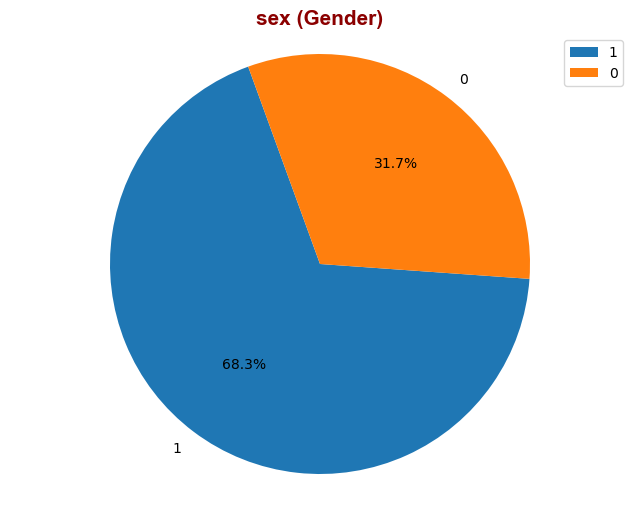

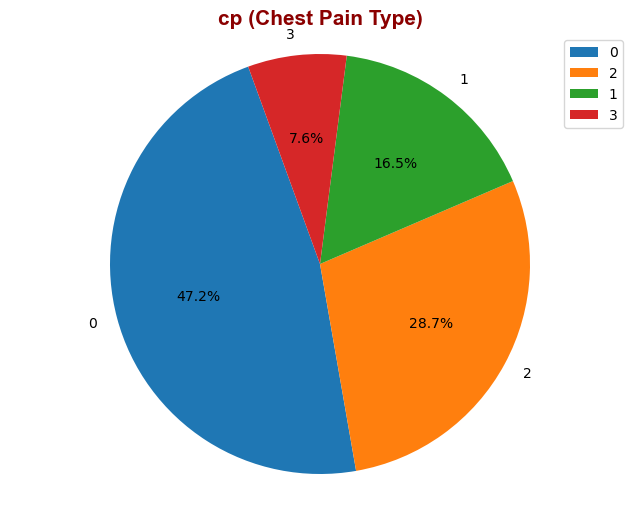

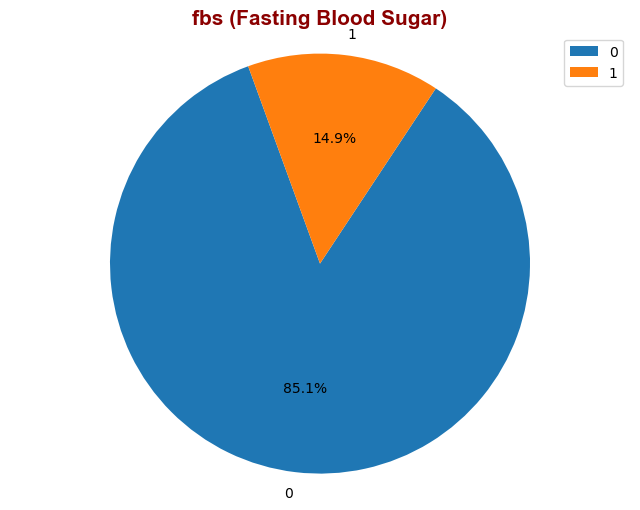

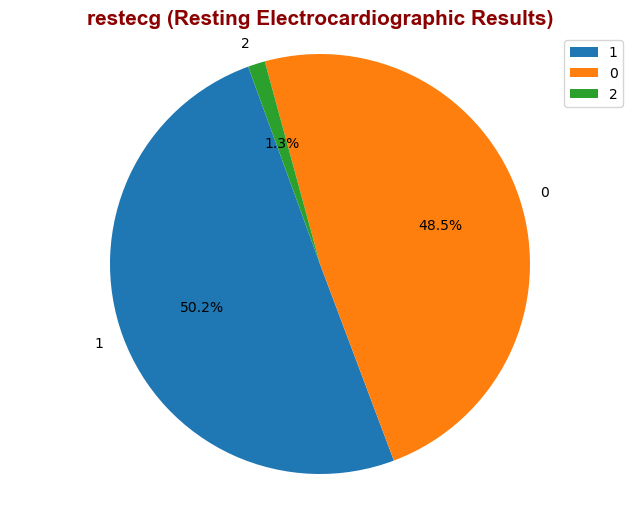

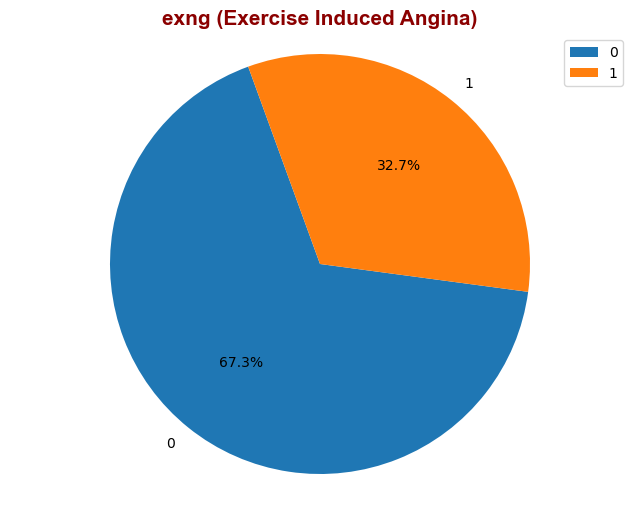

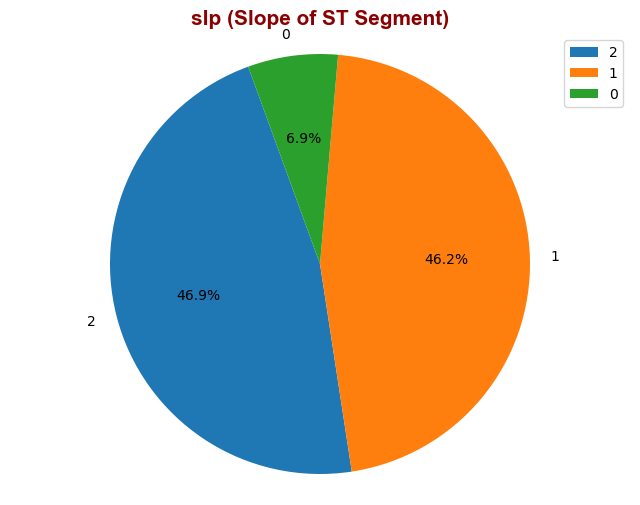

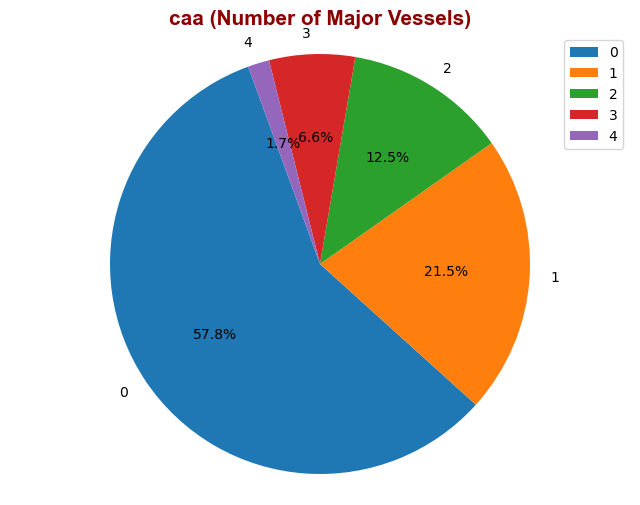

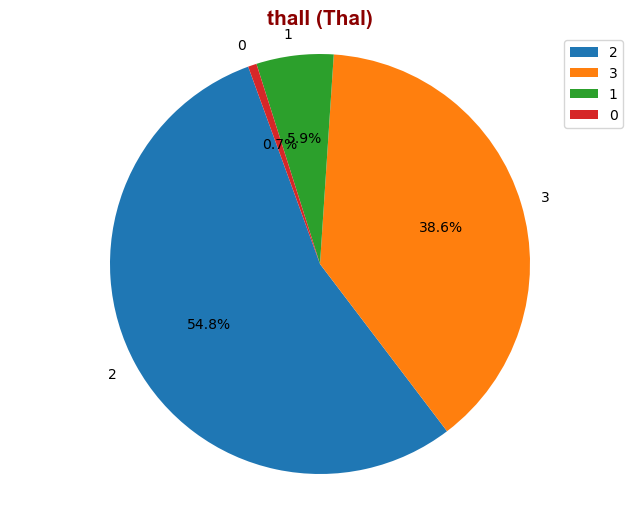

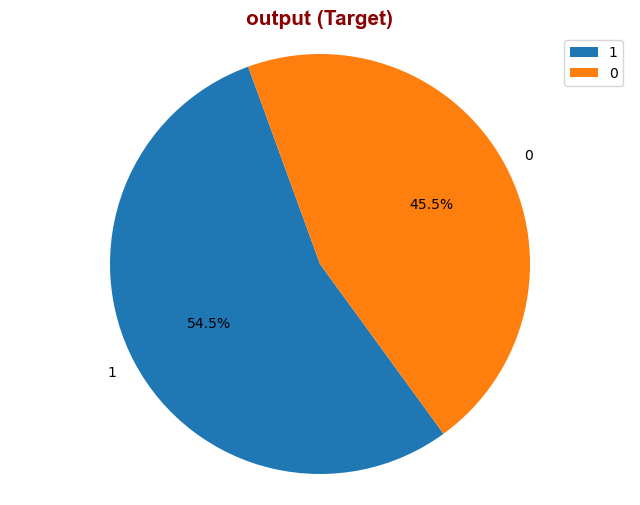

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming categoric_var contains the list of categorical columns in the dataset
categoric_var = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']
categoric_axis_name = ["Gender", "Chest Pain Type", "Fasting Blood Sugar", "Resting Electrocardiographic Results",
                      "Exercise Induced Angina", "Slope of ST Segment", "Number of Major Vessels", "Thal", "Target"]

# Font settings
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

# Plot each categorical variable as a pie chart
for i, z in list(zip(categoric_var, categoric_axis_name)):
    fig, ax = plt.subplots(figsize = (8, 6))
    
    observation_values = list(df[i].value_counts().index)
    total_observation_values = list(df[i].value_counts())
    
    ax.pie(total_observation_values, labels= observation_values, autopct = '%1.1f%%', startangle = 110, labeldistance = 1.1)
    ax.axis("equal") # Equal aspect ratio ensures that pie is drawn as a circle.
    
    plt.title((i + " (" + z + ")"), fontdict = title_font) # Naming Pie Chart Titles
    plt.legend()
    plt.show()

# Analysis of Sex Variable

- 68.3% male, 31.7% female (male patients are more than twice the number of female patients)

# Analysis of Cp Variable

- 50% asymptomatic angina (value 0)
- 29% atypical angina (value 2)
- 16.5% typical angina (value 1)
- 8% non-anginal pain (value 3)

# Analysis of Fbs Variable

- 85% have fasting blood sugar >120 mg/dl (value 1)
- 15% have fasting blood glucose <120 mg/dl (value 0)

# Analysis of Rest_ecg Variable

- 1.3% have ST and T wavelength abnormalities (value 2)
- 50.2% have normal resting electrocardiographic results (value 1)
- 48.5% have normal results (value 0)

# Analysis of Exang Variable

- 66.7% do not have exercise-induced angina (value 0)
- 33.3% have exercise-induced angina (value 1)

# Analysis of Slope Variable

- 7% have downward slope of ST wavelength (value 0)
- 46.5% have straight ST wavelength (value 1)
- 46.5% have upward slope of ST wavelength (value 2)

# Analysis of Ca Variable

- 57.8% have no large vessels colored by fluoroscopy (value 0)
- 21.5% have one large vessel colored (value 1)

# Analysis of Thal Variable

- 54.8% have normal thallium stress test result (value 2)
- 36.8% have reversible defect (value 3)
- 5.9% have fixed defect (value 1)
- 0 values will be replaced with null and filled with logical data

# Analysis of Target Variable

- 54.5% have heart attack risk
- 45.5% do not have heart attack risk


 #### Dealing with missing values of thal (According to our research, the observation value of 0 is null).

In [17]:
df[df["thall"] == 0]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


In [18]:
df["thall"] = df["thall"].replace(0, np.nan)
df[df['thall'].isna()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
48,53,0,2,128,216,0,0,115,0,0.0,2,0,NaN,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,NaN,0


In [19]:
isnull_number = []
for i in df.columns:
    x = df[i].isnull().sum()
    isnull_number.append(x)
    
pd.DataFrame(isnull_number, index = df.columns, columns = ["Total Missing Values"])

,Total Missing Values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


In [20]:
df["thall"].fillna(2, inplace = True)
df.loc[[48, 281], :]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
48,53,0,2,128,216,0,0,115,0,0.0,2,0,2.0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,2.0,0


In [21]:
df["thall"].value_counts()

thall
2.0    168
3.0    117
1.0     18
Name: count, dtype: int64

In [22]:
# Bivariate analysis is a statistical technique used to examine the relationship between two variables. 
''' Numerical Variables - Target Variable(Analysis with FaceGrid)'''

' Numerical Variables - Target Variable(Analysis with FaceGrid)'

In [23]:
numeric_var.append("output") # NOTE here output is our Target variable
numeric_var

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'output']

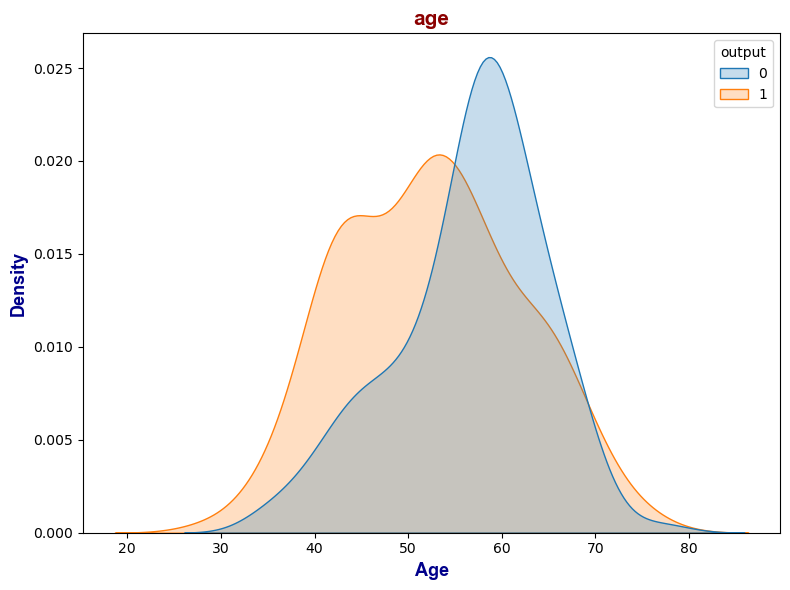

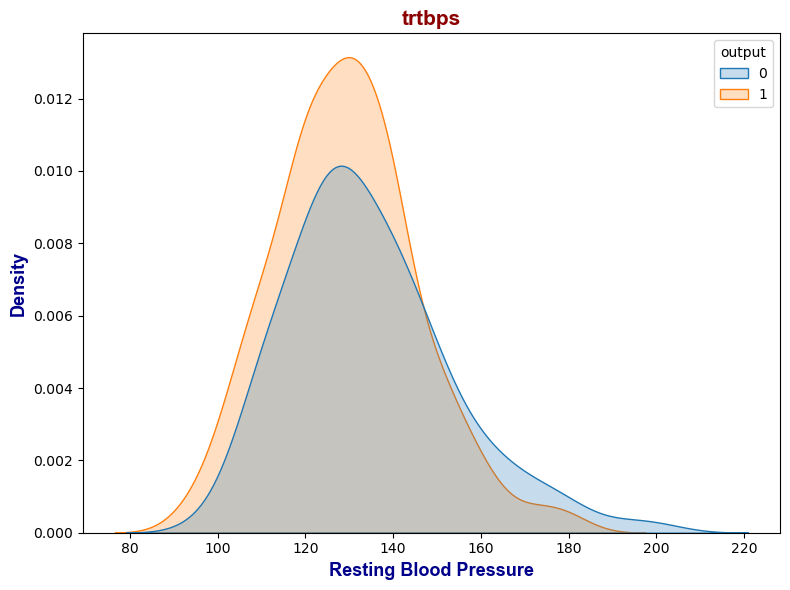

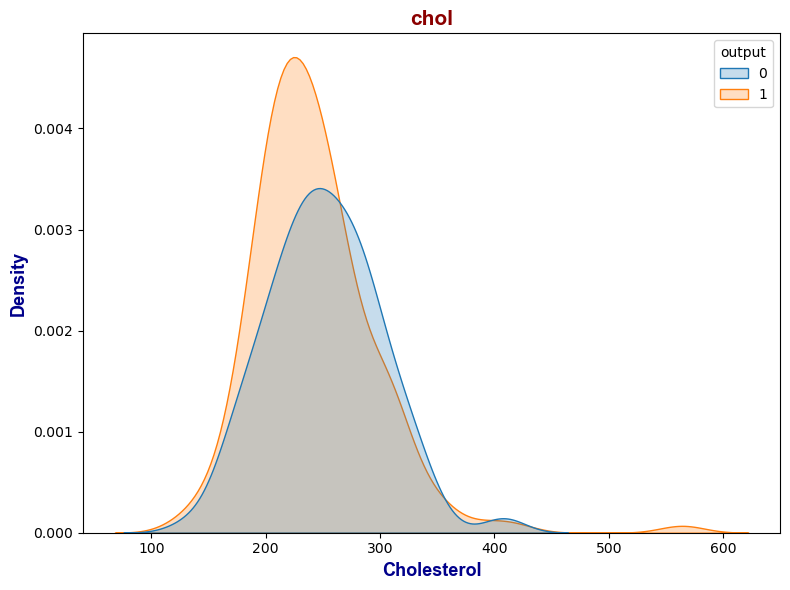

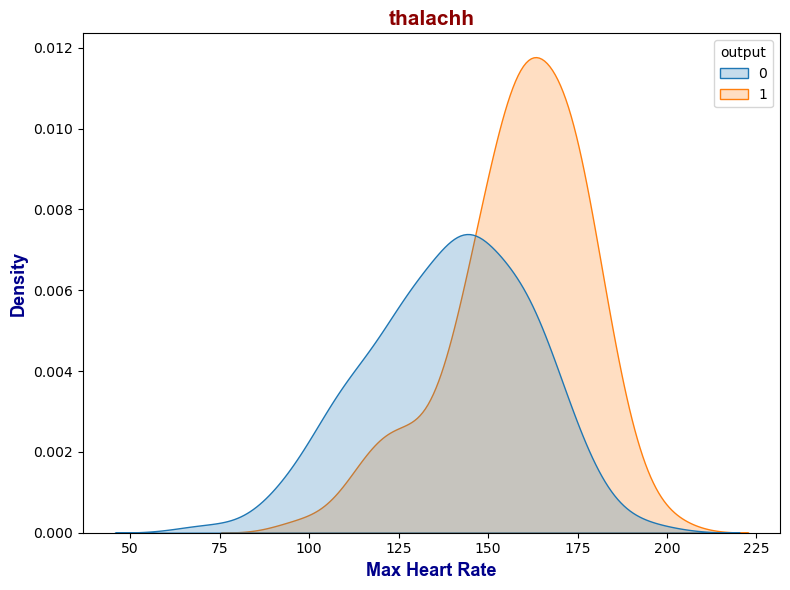

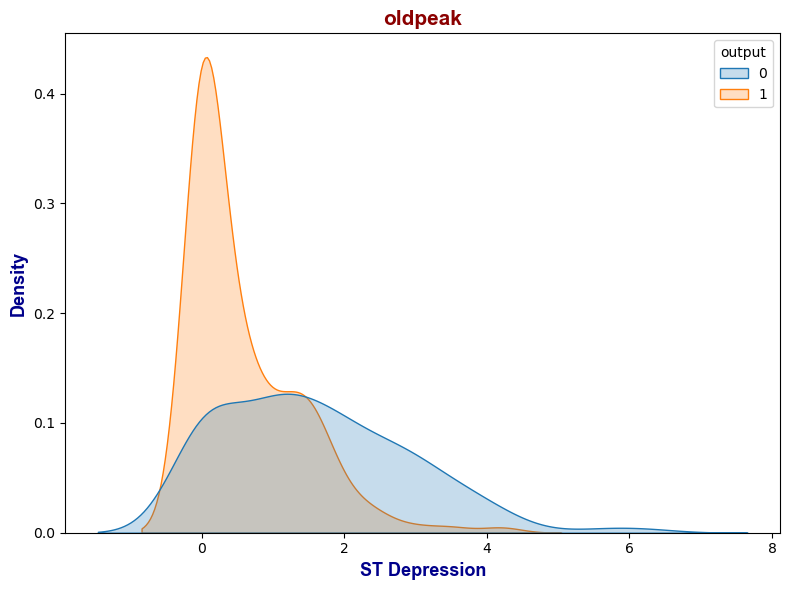

In [24]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(numeric_var, numeric_axis_name)):
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=df, x=i, hue="output", fill=True)
    plt.title(i, fontdict=title_font)
    plt.xlabel(z, fontdict=axis_font)
    plt.ylabel("Density", fontdict=axis_font)
    plt.tight_layout()
    plt.show()

In [25]:
df[numeric_var].corr()

,age,trtbps,chol,thalachh,oldpeak,output
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.225439
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.085239
thalachh,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,0.421741
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,-0.430696
output,-0.225439,-0.144931,-0.085239,0.421741,-0.430696,1.000000


In [26]:
# The code performs a correlation analysis between numerical variables in the DataFrame and the target variable.
df[numeric_var].corr().iloc[:, [-1]]

,output
age,-0.225439
trtbps,-0.144931
chol,-0.085239
thalachh,0.421741
oldpeak,-0.430696
output,1.000000


# KDE Plot Analysis

## Age - Target Variable

- Decrease in heart attack risk after age 55
- Interesting data contradicting the general belief that heart attack risk increases with age
- Negative correlation (-0.225439), little correlation

## Trtbps - Target Variable

- Complicated to predict heart attack risk from resting blood pressure
- Overlapping graphs indicate little correlation
- Maximum point at "trtbps" value of 130, but difficult to differentiate heart attack risk
- Negative correlation (-0.144931), little correlation

## Chol - Target Variable

- Cholesterol value of 200-250 is precarious for patients
- Similar image for patients with and without heart attack risk at beginning of graph
- Increase in probability of heart attack from 180 to 250, but difficult to differentiate after 250
- Negative correlation (-0.085239), very little correlation

## Thalach - Target Variable

- Higher maximum heart rate, higher probability of heart attack
- Parallel increase in both possibilities up to 150, but distinct separation after 150
- Positive correlation (0.421741), moderate correlation

## Oldpeak - Target Variable

- Value between 0 and 1.5 is critical threshold for heart attack risk
- Significant increase in probability of heart attack within this range
- Distinct separation between the two bumps in the graph
- Negative correlation (-0.430696), moderate correlation


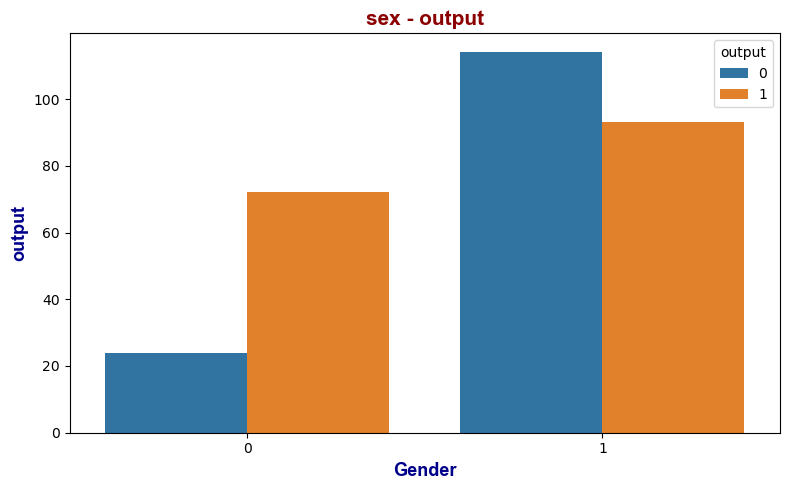

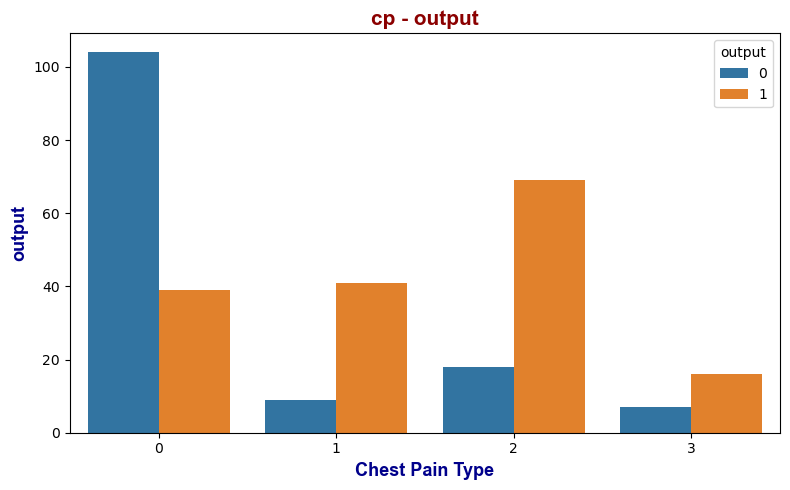

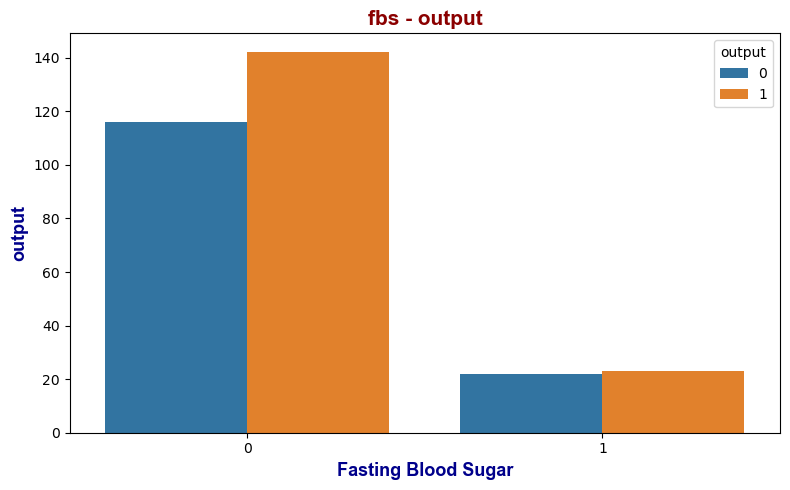

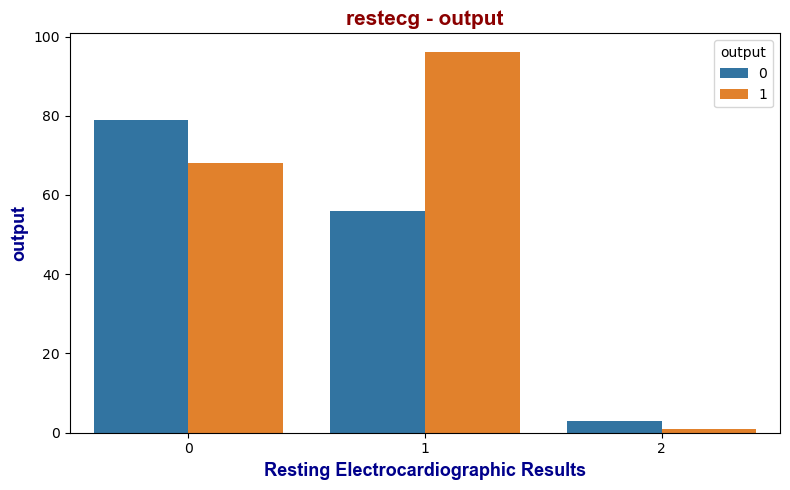

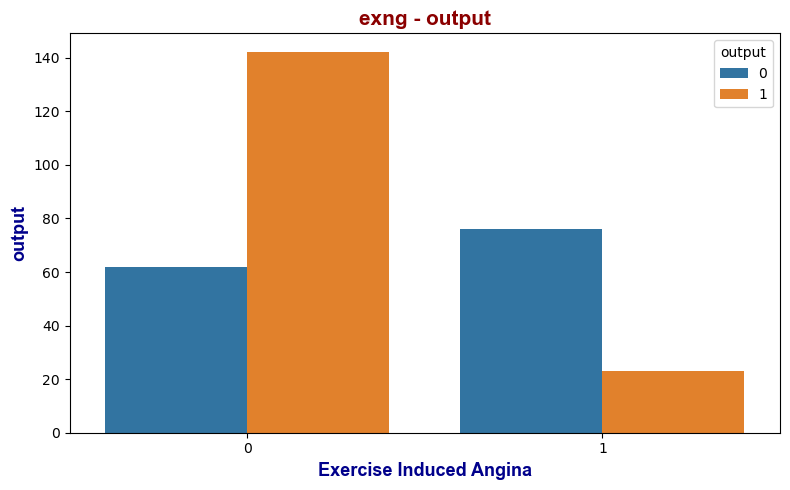

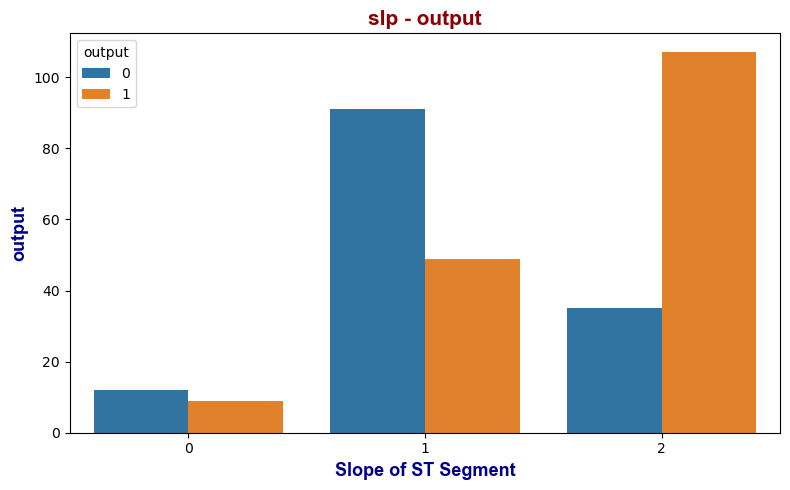

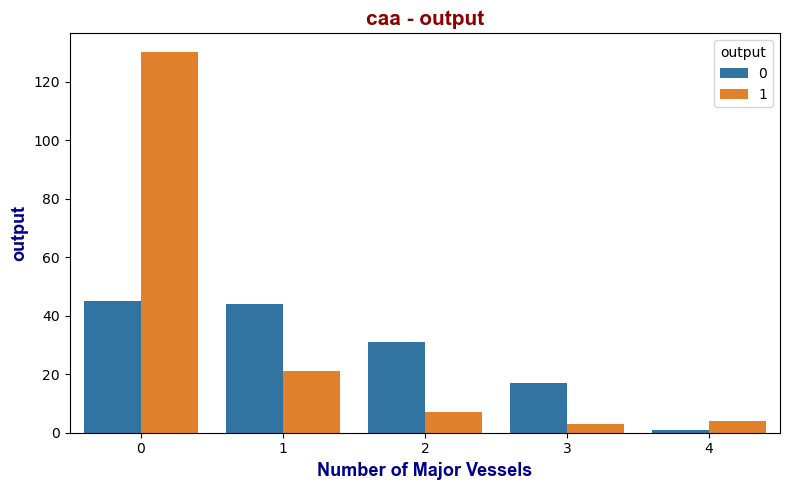

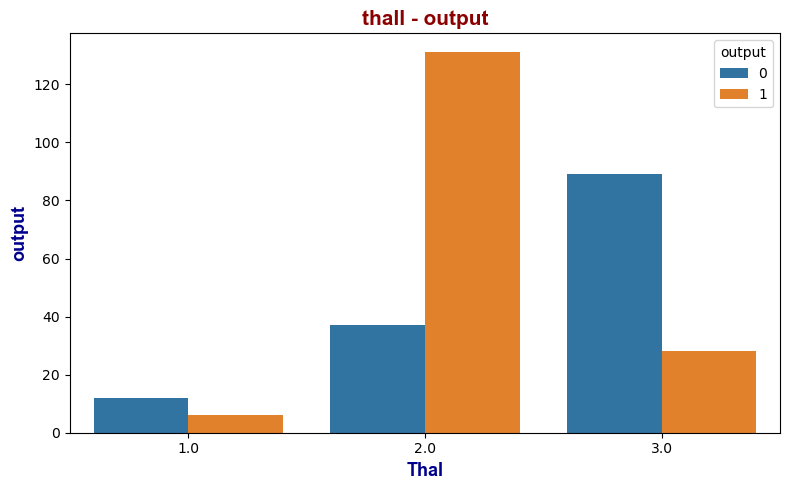

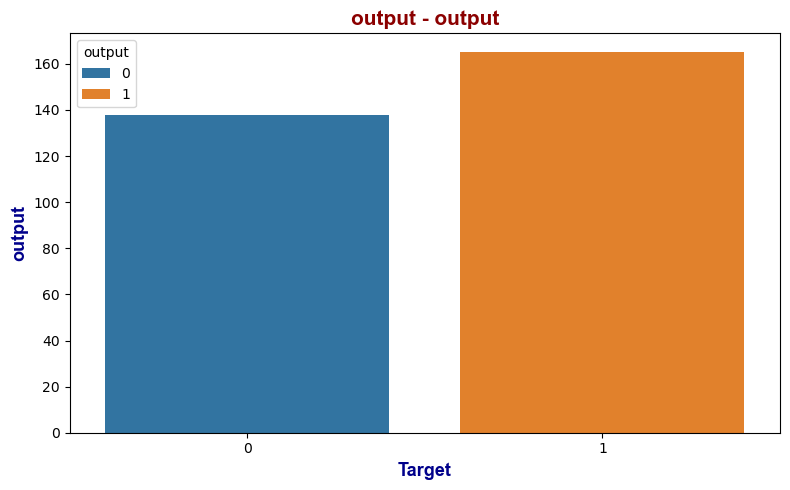

In [27]:
#  Categorical Variables - Target Variable(output)(Analysis with Count Plot)
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i, z in list(zip(categoric_var, categoric_axis_name)):
    plt.figure(figsize = (8, 5))
    sns.countplot(data = df[categoric_var], x = i, hue = "output")
    
    plt.title(i + " - output", fontdict = title_font)
    plt.xlabel(z, fontdict = axis_font)
    plt.ylabel("output", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

In [28]:
df[categoric_var].corr()

,sex,cp,fbs,restecg,exng,slp,caa,thall,output
sex,1.000000,-0.049353,0.045032,-0.058196,0.141664,-0.030711,0.118261,0.211652,-0.280937
cp,-0.049353,1.000000,0.094444,0.044421,-0.394280,0.119717,-0.181053,-0.169125,0.433798
fbs,0.045032,0.094444,1.000000,-0.084189,0.025665,-0.059894,0.137979,-0.011209,-0.028046
restecg,-0.058196,0.044421,-0.084189,1.000000,-0.070733,0.093045,-0.072042,-0.013795,0.137230
exng,0.141664,-0.394280,0.025665,-0.070733,1.000000,-0.257748,0.115739,0.225508,-0.436757
slp,-0.030711,0.119717,-0.059894,0.093045,-0.257748,1.000000,-0.080155,-0.106310,0.345877
caa,0.118261,-0.181053,0.137979,-0.072042,0.115739,-0.080155,1.000000,0.143248,-0.391724
thall,0.211652,-0.169125,-0.011209,-0.013795,0.225508,-0.106310,0.143248,1.000000,-0.363322
output,-0.280937,0.433798,-0.028046,0.137230,-0.436757,0.345877,-0.391724,-0.363322,1.000000


In [29]:
df[categoric_var].corr().iloc[:, [-1]]

,output
sex,-0.280937
cp,0.433798
fbs,-0.028046
restecg,0.137230
exng,-0.436757
slp,0.345877
caa,-0.391724
thall,-0.363322
output,1.000000


# Analysis Output with Count Plot

## Sex - Target Variable

- Female patients are at higher risk for heart attack
- Negative correlation (-0.280937), low-intensity correlation

## Cp - Target Variable

- Patients with asymptomatic pains (cp=0) are less likely to have a heart attack
- Patients with cp=1, 2, or 3 have a high risk of heart attack
- Positive correlation (0.433798), moderately strong correlation

## Fbs - Target Variable

- Patients with fasting blood sugar <120 mg/dl are at higher risk
- Very low-intensity correlation (-0.028046), negative direction

## Rest_ecg - Target Variable

- Patients with rest_ecg=1 are at higher risk of heart attack
- Positive correlation (0.137230), low-intensity correlation

## Exang - Target Variable

- Exercise-related pain does not affect heart attack risk
- Negative correlation (-0.436757), moderately strong correlation

## Slope - Target Variable

- Patients with slope=2 are at higher risk of heart attack
- Positive correlation (0.345877), moderately strong correlation

## Ca - Target Variable

- Patients with ca=0 are at higher risk of heart attack
- Negative correlation (-0.363322), moderately strong correlation

## Thal - Target Variable

- Patients with thal=2 are at higher risk of heart attack
- Negative correlation (-0.363322), moderately strong correlation


## Examining Numeric Variables Among Themselves(Analysis with Pair Plot)

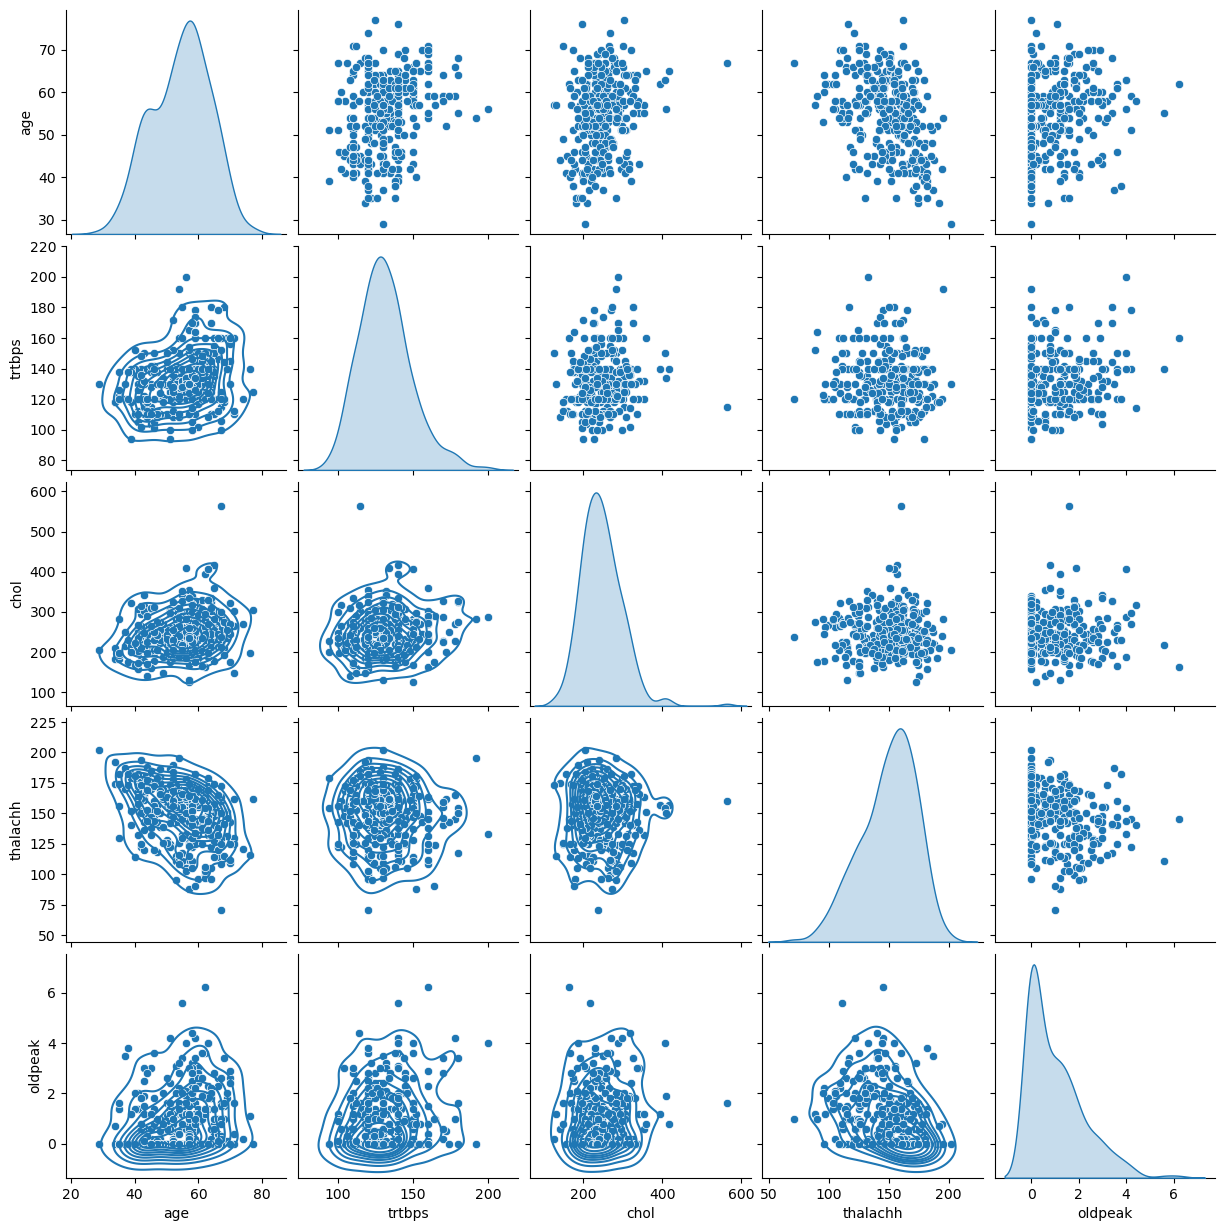

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_var = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
graph = sns.pairplot(df[numeric_var], diag_kind = "kde")
graph.map_lower(sns.kdeplot)
plt.show()

# Analysis Output

## Age Variable

- Most related variable is "thalach"
- Negative correlation (points pointing downwards)
- Moderate correlation (points are somewhat scattered)

## Trtbps Variable

- Weak relationship with other variables
- Positive correlation with age variable
- Lowest correlation with "thalach" variable
- Messy distribution of points

## Chol Variable

- Highest correlation with "age" and "trtbps" variables
- Slightly higher relationship with "age" variable
- Cholesterol increases with age
- Almost no relationship with other variables

## Thalach Variable

- Most related variable is "age"
- Moderately negative relationship
- No significant correlation with "trtbps" and "chol" variables
- Close relationship with "oldpeak" variable at middle level

## Oldpeak Variable

- Similar relationship with all variables
- Close relationship with moderate level with all variables


## Feature Scaling with the RobustScaler Method

In [31]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
scaled_data = robust_scaler.fit_transform(df[numeric_var])
scaled_data

array([[ 0.59259259,  0.75      , -0.11023622, -0.09230769,  0.9375    ],
       [-1.33333333,  0.        ,  0.15748031,  1.04615385,  1.6875    ],
       [-1.03703704,  0.        , -0.56692913,  0.58461538,  0.375     ],
       ...,
       [ 0.96296296,  0.7       , -0.74015748, -0.36923077,  1.625     ],
       [ 0.14814815,  0.        , -1.71653543, -1.16923077,  0.25      ],
       [ 0.14814815,  0.        , -0.06299213,  0.64615385, -0.5       ]])

In [32]:
df_scaled = pd.DataFrame(scaled_data, columns = numeric_var)
df_scaled.head()

,age,trtbps,chol,thalachh,oldpeak
0,0.592593,0.75,-0.110236,-0.092308,0.9375
1,-1.333333,0.00,0.157480,1.046154,1.6875
2,-1.037037,0.00,-0.566929,0.584615,0.3750
3,0.074074,-0.50,-0.062992,0.769231,0.0000
4,0.148148,-0.50,1.795276,0.307692,-0.1250


In [33]:
# Creating a New DataFrame with the Melt() Function
df_new = pd.concat([df_scaled, df.loc[:, "output"]], axis = 1)
df_new.head()

,age,trtbps,chol,thalachh,oldpeak,output
0,0.592593,0.75,-0.110236,-0.092308,0.9375,1
1,-1.333333,0.00,0.157480,1.046154,1.6875,1
2,-1.037037,0.00,-0.566929,0.584615,0.3750,1
3,0.074074,-0.50,-0.062992,0.769231,0.0000,1
4,0.148148,-0.50,1.795276,0.307692,-0.1250,1


In [34]:
# Relationships between variables(Analysis with Heatmap)
df_new2 = pd.concat([df_scaled, df[categoric_var]], axis = 1)
df_new2.corr()

,age,trtbps,chol,thalachh,oldpeak,sex,cp,fbs,restecg,exng,slp,caa,thall,output
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.098447,-0.068653,0.121308,-0.116211,0.096801,-0.168814,0.276326,0.066745,-0.225439
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.056769,0.047608,0.177531,-0.114103,0.067616,-0.121475,0.101389,0.060638,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.197912,-0.076904,0.013294,-0.151040,0.067023,-0.004038,0.070511,0.087866,-0.085239
thalachh,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,-0.044020,0.295762,-0.008567,0.044123,-0.378812,0.386784,-0.213177,-0.115310,0.421741
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,0.096093,-0.149230,0.005747,-0.058770,0.288223,-0.577537,0.222682,0.210236,-0.430696
sex,-0.098447,-0.056769,-0.197912,-0.044020,0.096093,1.000000,-0.049353,0.045032,-0.058196,0.141664,-0.030711,0.118261,0.211652,-0.280937
cp,-0.068653,0.047608,-0.076904,0.295762,-0.149230,-0.049353,1.000000,0.094444,0.044421,-0.394280,0.119717,-0.181053,-0.169125,0.433798
fbs,0.121308,0.177531,0.013294,-0.008567,0.005747,0.045032,0.094444,1.000000,-0.084189,0.025665,-0.059894,0.137979,-0.011209,-0.028046
restecg,-0.116211,-0.114103,-0.151040,0.044123,-0.058770,-0.058196,0.044421,-0.084189,1.000000,-0.070733,0.093045,-0.072042,-0.013795,0.137230
exng,0.096801,0.067616,0.067023,-0.378812,0.288223,0.141664,-0.394280,0.025665,-0.070733,1.000000,-0.257748,0.115739,0.225508,-0.436757


<Axes: >

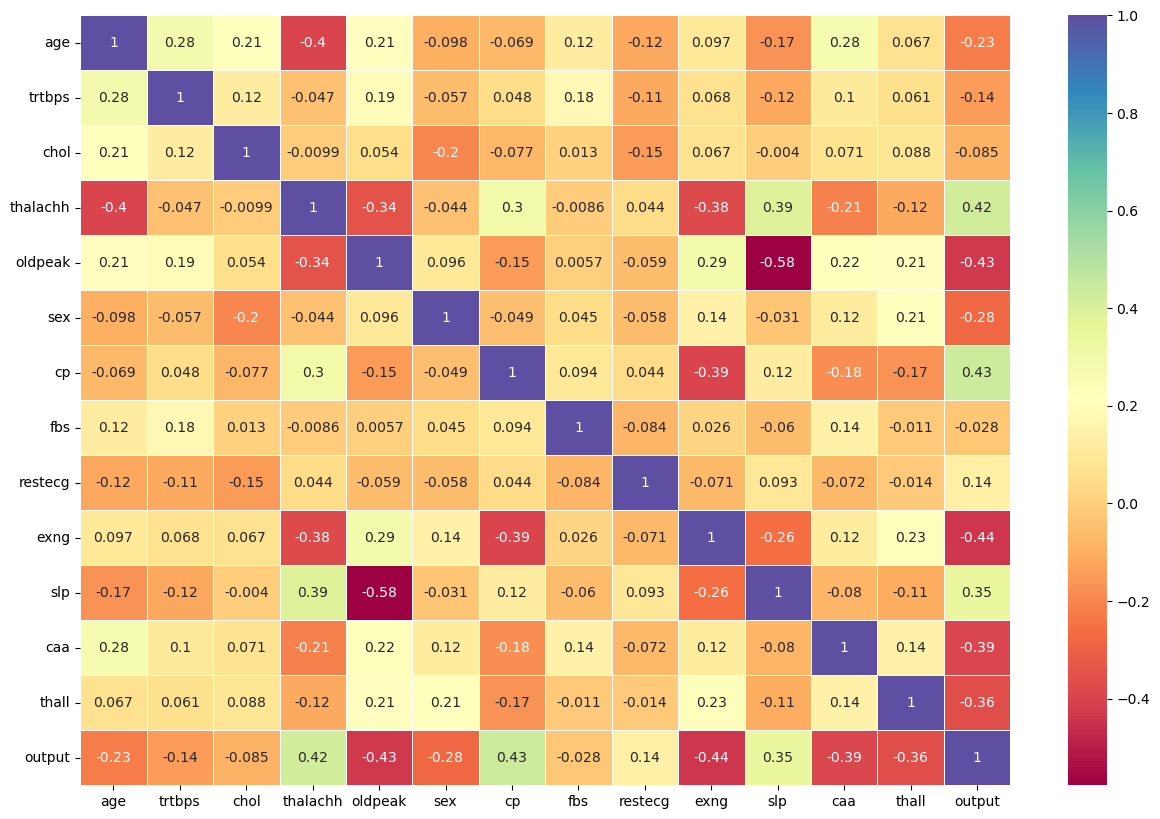

In [35]:
plt.figure(figsize = (15, 10))
sns.heatmap(data = df_new2.corr(), cmap = "Spectral", annot = True, linewidths = 0.5)

# Analysis Output

## Age Variable:
- Highest correlation with "thalach" variable (-0.40, moderate negative correlation)
    - Inverse relationship: heart rate reached decreases as age increases

## Trtbps Variable:
- Highest correlation with "age" variable (0.28, positive low-intensity correlation)

## Chol Variable:
- Highest correlation with "age" variable (0.21, low positive correlation)
    - Cholesterol increases as age increases

## Thalach Variable:
- Highest correlation with "target" variable (0.42, positive moderate correlation)
    - Direct relationship: maximum heart rate reached may trigger a heart attack

## Oldpeak Variable:
- Highest correlation with "slope" variable (-0.58, negative above-moderate correlation)
- Highest correlation with "target" variable (negative correlation)

## Sex Variable:
- No robust correlation with other variables
- Highest correlation with "target" variable (-0.28, negative low-intensity correlation)

## Cp Variable:
- High correlation with "thalach", "exang", and "target" variables
- Direct proportion with "target


## Preparation for Modeling

In [36]:
df.drop(["chol", "fbs", "restecg"], axis = 1, inplace = True)

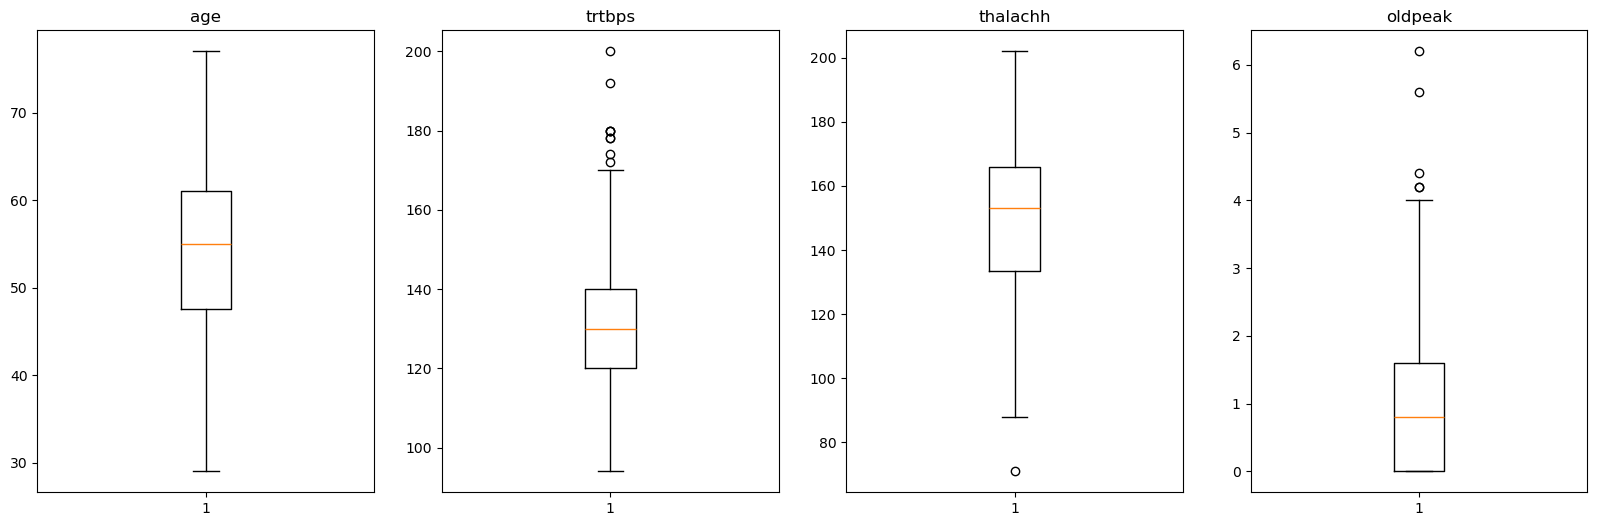

In [37]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 6))

ax1.boxplot(df["age"])
ax1.set_title("age")

ax2.boxplot(df["trtbps"])
ax2.set_title("trtbps")

ax3.boxplot(df["thalachh"])
ax3.set_title("thalachh")

ax4.boxplot(df["oldpeak"])
ax4.set_title("oldpeak")

plt.show()

# Analysis Outputs: Box Plot Analysis

## Age Variable:
- No outliers
- Box stands at the midpoint of the whiskers
- Symmetric distribution

## Trtbps Variable:
- More outliers compared to other variables
- Distribution prone to normal distribution
- Box appears near the middle of the two whiskers
- Symmetric distribution

## Thalach Variable:
- Few outliers
- One outlier under the lower whisker
- Slight left skew (box shifted upwards)
- Concentration of data on the right side

## Oldpeak Variable:
- No lower whisker
- Box bottom at the level of the lower whisker
- Values concentrated on the left side
- Right skew (queue to the right)
- Outliers above the upper whisker


## Dealing with outliers

In [38]:
# Trtbps Variable
from scipy import stats
from scipy.stats import zscore
from scipy.stats.mstats import winsorize 
z_scores_trtbps = zscore(df["trtbps"])
for threshold in range(1, 4):
    print("Threshold Value: {}".format(threshold))
    print("Number of Outliers: {}".format(len(np.where(z_scores_trtbps > threshold)[0])))
    print("-------------------")

Threshold Value: 1
Number of Outliers: 51
-------------------
Threshold Value: 2
Number of Outliers: 13
-------------------
Threshold Value: 3
Number of Outliers: 2
-------------------


In [39]:
df[z_scores_trtbps > 2][["trtbps"]]

,trtbps
8,172
101,178
110,180
152,170
195,170
203,180
223,200
228,170
241,174
248,192


In [40]:
df[z_scores_trtbps > 2].trtbps.min(), df[df["trtbps"] < 170].trtbps.max()

(170, 165)

In [41]:
winsorize_percentile_trtbps = (stats.percentileofscore(df["trtbps"], 165)) / 100
print(winsorize_percentile_trtbps)

0.957095709570957


In [42]:
1 - winsorize_percentile_trtbps

0.04290429042904298

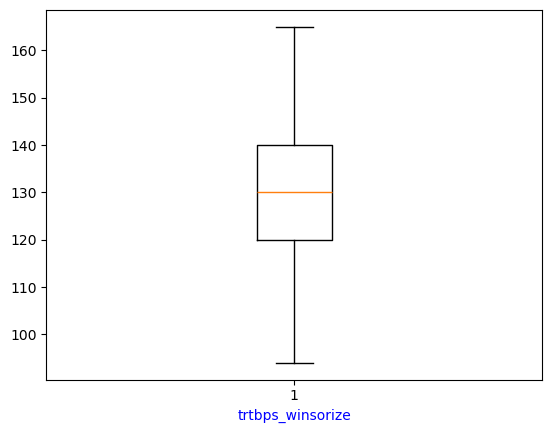

In [43]:
trtbps_winsorize = winsorize(df.trtbps, (0, (1 - winsorize_percentile_trtbps)))
plt.boxplot(trtbps_winsorize)
plt.xlabel("trtbps_winsorize", color = "b")
plt.show()

In [44]:
df["trtbps_winsorize"] = trtbps_winsorize
df.head()

,age,sex,cp,trtbps,thalachh,exng,oldpeak,slp,caa,thall,output,trtbps_winsorize
0,63,1,3,145,150,0,2.3,0,0,1.0,1,145
1,37,1,2,130,187,0,3.5,0,0,2.0,1,130
2,41,0,1,130,172,0,1.4,2,0,2.0,1,130
3,56,1,1,120,178,0,0.8,2,0,2.0,1,120
4,57,0,0,120,163,1,0.6,2,0,2.0,1,120


In [45]:
#Thalach Variable
def iqr(df, var):
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    diff = q3 - q1
    lower_v = q1 - (1.5 * diff)
    upper_v = q3 + (1.5 * diff)
    return df[(df[var] < lower_v) | (df[var] > upper_v)]
thalach_out = iqr(df, "thalachh")
thalach_out

,age,sex,cp,trtbps,thalachh,exng,oldpeak,slp,caa,thall,output,trtbps_winsorize
272,67,1,0,120,71,0,1.0,1,0,2.0,0,120


In [46]:
df.drop([272], axis = 0, inplace = True)
df["thalachh"][270:275]

270    144
271    145
273    156
274    118
275    168
Name: thalachh, dtype: int64

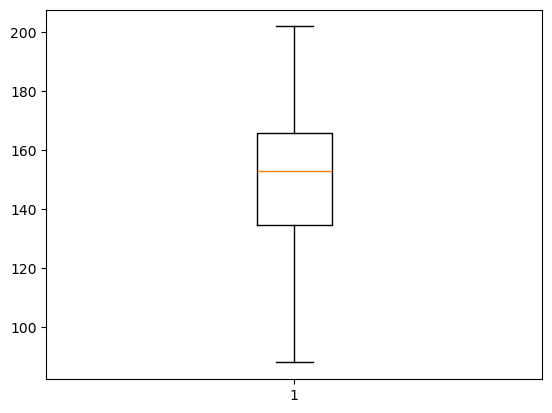

In [47]:
plt.boxplot(df["thalachh"]);

In [48]:
#Oldpeak Variable
iqr(df, "oldpeak")

,age,sex,cp,trtbps,thalachh,exng,oldpeak,slp,caa,thall,output,trtbps_winsorize
101,59,1,3,178,145,0,4.2,0,0,3.0,1,165
204,62,0,0,160,145,0,6.2,0,3,3.0,0,160
221,55,1,0,140,111,1,5.6,0,0,3.0,0,140
250,51,1,0,140,122,1,4.2,1,3,3.0,0,140
291,58,1,0,114,140,0,4.4,0,3,1.0,0,114


In [49]:
df[df["oldpeak"] < 4.2].oldpeak.max()

4.0

In [50]:
winsorize_percentile_oldpeak = (stats.percentileofscore(df["oldpeak"], 4)) / 100
print(winsorize_percentile_oldpeak)

0.980132450331126


In [51]:
oldpeak_winsorize = winsorize(df.oldpeak, (0, (1 - winsorize_percentile_oldpeak)))

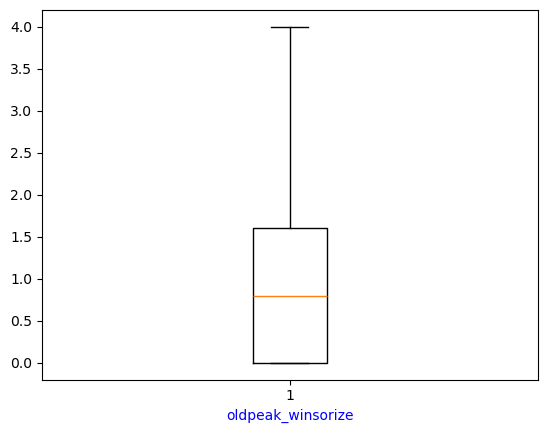

In [52]:
plt.boxplot(oldpeak_winsorize)
plt.xlabel("oldpeak_winsorize", color = "b")
plt.show()

In [53]:
df["oldpeak_winsorize"] = oldpeak_winsorize
df.drop(["trtbps", "oldpeak"], axis = 1, inplace = True)
df.head()

,age,sex,cp,thalachh,exng,slp,caa,thall,output,trtbps_winsorize,oldpeak_winsorize
0,63,1,3,150,0,0,0,1.0,1,145,2.3
1,37,1,2,187,0,0,0,2.0,1,130,3.5
2,41,0,1,172,0,2,0,2.0,1,130,1.4
3,56,1,1,178,0,2,0,2.0,1,120,0.8
4,57,0,0,163,1,2,0,2.0,1,120,0.6


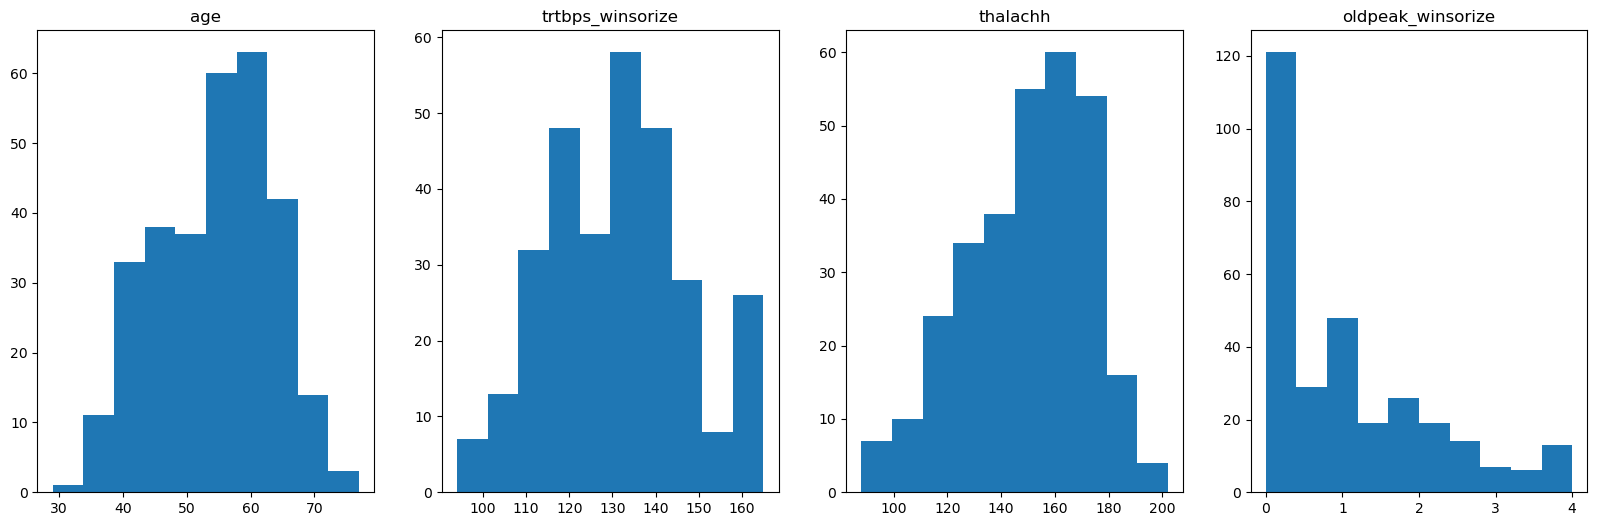

In [54]:
# Determining Distributions of Numeric Variables
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (20, 6))

ax1.hist(df["age"])
ax1.set_title("age")

ax2.hist(df["trtbps_winsorize"])
ax2.set_title("trtbps_winsorize")

ax3.hist(df["thalachh"])
ax3.set_title("thalachh")

ax4.hist(df["oldpeak_winsorize"])
ax4.set_title("oldpeak_winsorize")

plt.show()

In [55]:
df[["age", "trtbps_winsorize", "thalachh", "oldpeak_winsorize"]].agg(["skew"]).transpose()

,skew
age,-0.199209
trtbps_winsorize,0.251969
thalachh,-0.461611
oldpeak_winsorize,0.996036


## Transformation Operations on Unsymmetrical Data

In [56]:
import numpy as np

# Add a small constant to avoid zero and negative values
const = 1e-6

df["oldpeak_winsorize_log"] = np.log(df["oldpeak_winsorize"] + const)
df["oldpeak_winsorize_sqrt"] = np.sqrt(df["oldpeak_winsorize"] + const)

# Calculate skewness
df[["oldpeak_winsorize", "oldpeak_winsorize_log", "oldpeak_winsorize_sqrt"]].agg(["skew"]).transpose()

,skew
oldpeak_winsorize,0.996036
oldpeak_winsorize_log,-0.699515
oldpeak_winsorize_sqrt,0.109778


In [57]:
df.drop(["oldpeak_winsorize", "oldpeak_winsorize_log"], axis = 1, inplace = True)
df.head()

,age,sex,cp,thalachh,exng,slp,caa,thall,output,trtbps_winsorize,oldpeak_winsorize_sqrt
0,63,1,3,150,0,0,0,1.0,1,145,1.516575
1,37,1,2,187,0,0,0,2.0,1,130,1.870829
2,41,0,1,172,0,2,0,2.0,1,130,1.183216
3,56,1,1,178,0,2,0,2.0,1,120,0.894428
4,57,0,0,163,1,2,0,2.0,1,120,0.774597


In [58]:
df_copy = df.copy()

# Safely remove elements from the list if they exist
if "fbs" in categoric_var:
    categoric_var.remove("fbs")
if "restecg" in categoric_var:
    categoric_var.remove("restecg")

categoric_var  # Now it will show the updated list

# Create dummy variables for the remaining categorical variables
df_copy = pd.get_dummies(df_copy, columns=categoric_var[:-1], drop_first=True)

# Display the first few rows of the transformed DataFrame
df_copy.head()

,age,thalachh,output,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_2.0,thall_3.0
0,63,150,1,145,1.516575,True,False,False,True,False,False,False,False,False,False,False,False,False
1,37,187,1,130,1.870829,True,False,True,False,False,False,False,False,False,False,False,True,False
2,41,172,1,130,1.183216,False,True,False,False,False,False,True,False,False,False,False,True,False
3,56,178,1,120,0.894428,True,True,False,False,False,False,True,False,False,False,False,True,False
4,57,163,1,120,0.774597,False,False,False,False,True,False,True,False,False,False,False,True,False


In [59]:
# Feature Scaling with the RobustScaler Method for Machine Learning Algorithms
new_numeric_var = ["age", "thalachh", "trtbps_winsorize", "oldpeak_winsorize_sqrt"]
robus_scaler = RobustScaler()
df_copy[new_numeric_var] = robust_scaler.fit_transform(df_copy[new_numeric_var])
df_copy.head()

,age,thalachh,output,trtbps_winsorize,oldpeak_winsorize_sqrt,sex_1,cp_1,cp_2,cp_3,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_2.0,thall_3.0
0,0.581818,-0.095238,1,0.75,0.492240,True,False,False,True,False,False,False,False,False,False,False,False,False
1,-1.309091,1.079365,1,0.00,0.772523,True,False,True,False,False,False,False,False,False,False,False,True,False
2,-1.018182,0.603175,1,0.00,0.228488,False,True,False,False,False,False,True,False,False,False,False,True,False
3,0.072727,0.793651,1,-0.50,0.000000,True,True,False,False,False,False,True,False,False,False,False,True,False
4,0.145455,0.317460,1,-0.50,-0.094809,False,False,False,False,True,False,True,False,False,False,False,True,False


##  Separating Data into Test and Training Set

In [61]:
from sklearn.model_selection import train_test_split
X = df_copy.drop(["output"], axis = 1)
y = df_copy[["output"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 3)
print(f"X_train: {X_train.shape[0]}")
print(f"X_test: {X_test.shape[0]}")
print(f"y_train: {y_train.shape[0]}")
print(f"y_test: {y_test.shape[0]}")

X_train: 271
X_test: 31
y_train: 271
y_test: 31


## Random Forest Algorithm a high accuracccy method

In [76]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the RandomForestClassifier
random_forest_new = RandomForestClassifier(random_state=5)

# Define the hyperparameters to search
parameters = {
    "n_estimators": [50, 100, 150, 200],
    "criterion": ["gini", "entropy"],
    'max_features': ['sqrt', 'log2'],  # Removed 'auto' and added 'sqrt' as default
    'bootstrap': [True, False]
}

# Initialize GridSearchCV with the random forest and parameters
random_forest_grid = GridSearchCV(random_forest_new, param_grid=parameters)

# Fit the model to the training data
random_forest_grid.fit(X_train, y_train.values.ravel())  # Convert y_train to 1D array

GridSearchCV(estimator=RandomForestClassifier(random_state=5),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]})

In [64]:
print("Best Parameters:", random_forest_grid.best_params_)

Best Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 200}


In [77]:
random_forest_new2 = RandomForestClassifier(
    bootstrap=True, 
    criterion="entropy", 
    max_features="sqrt",  # Replaced 'auto' with 'sqrt'
    n_estimators=200, 
    random_state=5
)

random_forest_new2.fit(X_train, y_train.values.ravel())  # Convert y_train to 1D array

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=5)

In [66]:
y_pred = random_forest_new2.predict(X_test)
print("The test accuracy score of Random Forest after hyper-parameter tuning is:", accuracy_score(y_test, y_pred))

The test accuracy score of Random Forest after hyper-parameter tuning is: 0.9032258064516129


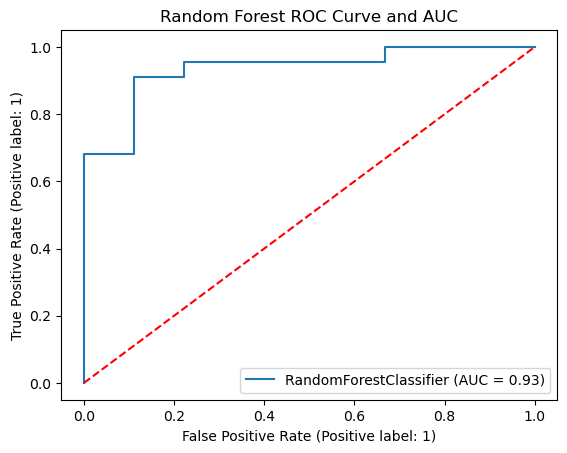

In [67]:
# Import necessary libraries
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

# Assuming random_forest_new2 is your trained model
RocCurveDisplay.from_estimator(random_forest_new2, X_test, y_test)

# Add title and plot the diagonal line for reference
plt.title("Random Forest ROC Curve and AUC")
plt.plot([0, 1], [0, 1], "r--")

# Show the plot
plt.show()

## Finally over model is ready for predictions

In [79]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import joblib

# Prepare your DataFrame (replace df_copy with your actual DataFrame name)
new_numeric_vars = ["age", "thalachh", "trtbps_winsorize", "oldpeak_winsorize_sqrt"]

# Feature scaling
scaler = RobustScaler()
df_copy[new_numeric_vars] = scaler.fit_transform(df_copy[new_numeric_vars])

# Separate features and target
X = df_copy.drop(["output"], axis=1)
y = df_copy["output"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=3)

# Initialize and train RandomForestClassifier with GridSearchCV
random_forest = RandomForestClassifier(random_state=5)
parameters = {
    "n_estimators": [50, 100, 150, 200],
    "criterion": ["gini", "entropy"],
    "max_features": ['sqrt', 'log2'],  # Replaced 'auto' with 'sqrt'
    "bootstrap": [True, False]
}
grid_search = GridSearchCV(estimator=random_forest, param_grid=parameters, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_forest = grid_search.best_estimator_

# Save the model
joblib.dump(best_forest, 'best_forest_model.pkl')

['best_forest_model.pkl']

In [80]:
best_forest = joblib.load('best_forest_model.pkl')

In [81]:
import joblib

# Specify the full path where the model is saved
model_path = 'best_forest_model.pkl'
best_forest = joblib.load(model_path)

# Proceed with prediction as before

## This will ask inputs from user and provide output

In [73]:
import pandas as pd
import joblib

# Load the trained model
model_path = 'best_forest_model.pkl'
best_forest = joblib.load(model_path)

# Define Winsorizing thresholds (adjust as needed)
lower_bound = 100
upper_bound = 160

# Define a function to get user input and make a prediction
def predict_from_input():
    # Get user inputs
    age = float(input("Enter age: "))
    thalachh = float(input("Enter maximum heart rate achieved (thalachh): "))
    trtbps = float(input("Enter systolic blood pressure (trtbps): "))
    oldpeak = float(input("Enter ST depression induced by exercise relative to rest (oldpeak): "))

    # Create a DataFrame with the input data
    new_data = pd.DataFrame({
        "age": [age],
        "thalachh": [thalachh],
        "trtbps": [trtbps],
        "oldpeak": [oldpeak]
    })

    # Apply Winsorizing and transformation
    winsorized_trtbps = min(max(new_data["trtbps"][0], lower_bound), upper_bound)
    transformed_oldpeak = new_data["oldpeak"][0] ** 0.5

    # Prepare the new data
    preprocessed_new_data = pd.DataFrame({
        "age": [age],
        "thalachh": [thalachh],
        "trtbps_winsorize": [winsorized_trtbps],  # After Winsorizing
        "oldpeak_winsorize_sqrt": [transformed_oldpeak]  # After transformation
    })

    # Ensure all required features are present
    trained_features = X_train.columns
    for feature in trained_features:
        if feature not in preprocessed_new_data.columns:
            preprocessed_new_data[feature] = 0  # Add missing features with default value

    # Reorder columns to match the training data
    preprocessed_new_data = preprocessed_new_data[trained_features]

    # Make predictions
    predictions = best_forest.predict(preprocessed_new_data)

    # Print or return the predictions
    print(f"Predictions: {predictions[0]}")

# Call the function to start interactive input
predict_from_input()

Enter age:  30
Enter maximum heart rate achieved (thalachh):  120
Enter systolic blood pressure (trtbps):  110
Enter ST depression induced by exercise relative to rest (oldpeak):  3


Predictions: 0


## Heart Attack Risk Prediction

### Input Values:
- *Age:* 30
- *Maximum Heart Rate Achieved (thalachh):* 120
- *Systolic Blood Pressure (trtbps):* 110
- *ST Depression Induced by Exercise (oldpeak):* 3

### Output:
- *Prediction:* 0  
  0 means low risk of heart attack

---

The model predicts a low risk of heart attack based on the provided inputs. It is still important to maintain a healthy lifestyle and consult with a healthcare provider for regular checkups.

# Conclusion

- *Data Preparation:* Cleaned and structured the dataset.
- *Exploratory Analysis:* Used graphs and charts to explore relationships between variables.
- *Data Cleaning:* Addressed missing and incorrect values.
- *Model Development:* Built a *Random Forest Classifier* with *90.3% accuracy* and *93% AUC*.
- *Model Selection:* Chose the *Random Forest* as the best-performing model.
- *Predictions:* Accurately predicted heart attack risk based on input features.

Moving forward, I will *deploy this model* to assist in predicting heart attack risks, providing valuable insights for healthcare professionals and contributing to advancements in *medical science*.